In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.src.layers.pooling.max_pooling2d import MaxPooling2D
# custom model
# can use softmax activation functon later
# must have atleast one dense layer

custom_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# alexnet model
alexnet_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48,(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       55424     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 192)         221376    
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 192)        

In [ ]:
alexnet_history = alexnet_model.fit(
    train_images, train_labels,
    epochs = 10,
    validation_data=(test_images, test_labels),
    batch_size=64
)

Epoch 1/10
782/782 [==============================] - 22s 12ms/step - loss: 1.7050 - accuracy: 0.3573 - val_loss: 1.3216 - val_accuracy: 0.5031
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.2192 - accuracy: 0.5592 - val_loss: 1.0755 - val_accuracy: 0.6155
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 1.0157 - accuracy: 0.6426 - val_loss: 0.9722 - val_accuracy: 0.6527
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8875 - accuracy: 0.6899 - val_loss: 0.9133 - val_accuracy: 0.6831
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7958 - accuracy: 0.7243 - val_loss: 0.8360 - val_accuracy: 0.7148
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7222 - accuracy: 0.7475 - val_loss: 0.8188 - val_accuracy: 0.7200
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6643 - accuracy: 0.7679 - val_loss: 0.8121 - val_accuracy: 0.722

In [ ]:
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_model_history = custom_model.fit(
    train_images, train_labels,
    epochs = 10,
    validation_data=(test_images, test_labels),
    batch_size=64)

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 1.5169 - accuracy: 0.4465 - val_loss: 1.2259 - val_accuracy: 0.5635
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1436 - accuracy: 0.5952 - val_loss: 1.0484 - val_accuracy: 0.6213
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9958 - accuracy: 0.6523 - val_loss: 0.9470 - val_accuracy: 0.6658
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8781 - accuracy: 0.6940 - val_loss: 0.9450 - val_accuracy: 0.6682
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7875 - accuracy: 0.7253 - val_loss: 0.9046 - val_accuracy: 0.6875
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7146 - accuracy: 0.7516 - val_loss: 0.8296 - val_accuracy: 0.7181
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6551 - accuracy: 0.7709 - val_loss: 0.8120 - val_accuracy: 0.7208
Epoch 

In [ ]:
vgg_model = tf.keras.applications.VGG16(weights=None, input_shape=(32,32,3), classes=10)

In [ ]:
inception_model = tf.keras.applications.InceptionV3(weights=None, input_shape=(75,75,3), classes=10)

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 37, 37, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalizati

In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    batch_size=64
)

Epoch 1/10
782/782 [==============================] - 40s 44ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
782/782 [==============================] - 34s 44ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
782/782 [==============================] - 34s 43ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 34s 44ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 34s 44ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy:

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2777091684484945
Max: 244.946933028573


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


In [ ]:
# alexnet model
alexnet_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
alexnet_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
alexnet_model_2_history = alexnet_model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data = (X_test, y_test))

Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.1008 - accuracy: 0.9706 - val_loss: 0.1033 - val_accuracy: 0.9796
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0485 - accuracy: 0.9870 - val_loss: 0.0636 - val_accuracy: 0.9860
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0403 - accuracy: 0.9891 - val_loss: 0.0720 - val_accuracy: 0.9855
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0355 - accuracy: 0.9908 - val_loss: 0.0555 - val_accuracy: 0.9878
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.1092 - val_accuracy: 0.9877
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0267 - accuracy: 0.9928 - val_loss: 0.0431 - val_accuracy: 0.9920
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0235 - accuracy: 0.9942 - val_loss: 0.1510 - val_accuracy: 0.977

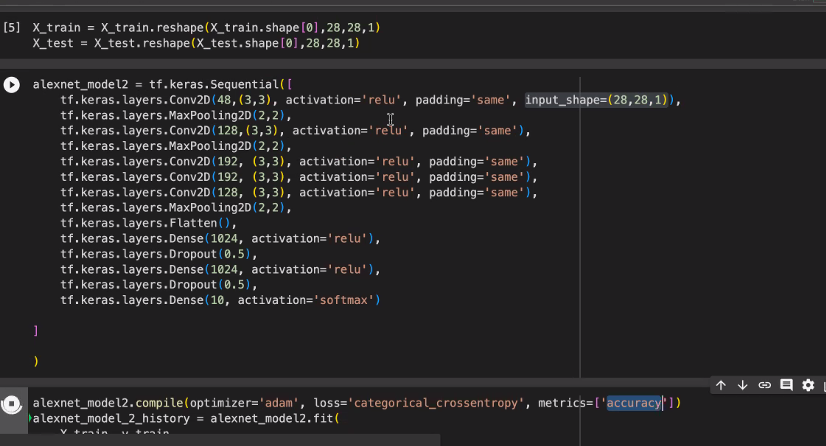

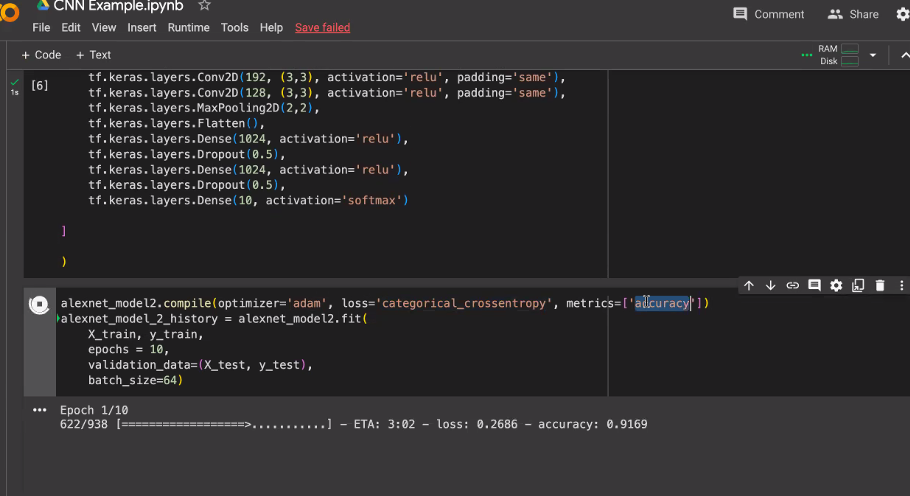

In [ ]:

custom_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
custom_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_model2_history = custom_model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data = (X_test, y_test))

Epoch 1/10
938/938 [==============================] - 9s 7ms/step - loss: 0.1286 - accuracy: 0.9609 - val_loss: 0.0491 - val_accuracy: 0.9856
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0669 - val_accuracy: 0.9845
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0440 - val_accuracy: 0.9894
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0400 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0386 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.1310 - val_accuracy: 0.9880
Epoch 